# Student Performance Indicator

## Life cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## 1) Problem Statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender , Ethicity, Parental level of education , Lunch and Test preparation course.

## 2) Data Collection 
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 columns and 1000 rows

### 2.1 Import Data and Required Packages

#### Importing Pandas , Numpy , Matplotlib , Seaborn and Warings Library.

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [71]:
df = pd.read_csv('data/stud.csv')

#### Show top 5 Records

In [72]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [73]:
df.shape

(1000, 8)

### 2.2 Dataset Information
- gender: sex of students -> (Male/Female)
- race/ethnicity: ethnicity of students -> (Group A,B,C,D,E)
- parental level of education: parent's final education -> (bachelor's degree, some college , master's degree , associate degree's degree , high school)
- lunch: having lunch before test(standard or free/reduced)
-test preparation course: complete or not complete before test
- math score
- reading score
- writing score

## 3) Data Checks to Perform
- Check Missing Values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of dataset 
- Check various categories present in the different categorical column

### 3.1 Check Missing Values

In [74]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There is no missing values in the dataset.

### 3.2 Checks for Duplicates

In [75]:
df.duplicated().sum()

0

##### There is no duplicates present

### 3.3 Check data types

In [76]:
# Check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [77]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [78]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights 
- All means are very close to each other - between 66 - 69.16 .
- standard deviation are also very close to each other - between 14.60 - 15.19 .
- minimun score for maths = 0 , minimum score for writing = 10 , minimum score for reading = 17  

### 3.6 Exploring Data

In [79]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [80]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [81]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
print(len(numeric_features))
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print(len(categorical_features))
#print columns
print('We have{} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

3
5
We have3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.7 Adding Columns for "Total Score" and "Average"

In [82]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [83]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [84]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Math: {math_full}')

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [85]:
reading_less_33 = df[df['reading_score'] <= 33]['average'].count()
writing_less_33 = df[df['writing_score'] <= 33]['average'].count()
math_less_33 = df[df['math_score'] <= 33]['average'].count()

print(f'Number of students with less than 33 marks in Reading: {reading_less_33}')
print(f'Number of students with less than 33 marks in Writing: {writing_less_33}')
print(f'Number of students with less than 33 marks in Math: {math_less_33}')

Number of students with less than 33 marks in Reading: 11
Number of students with less than 33 marks in Writing: 14
Number of students with less than 33 marks in Math: 20


#### Insights
- From above values we et students performed the worst in Maths
- Best performance is in reading section

## 4) Exploring Data (Visualization)

### 4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram and KDE

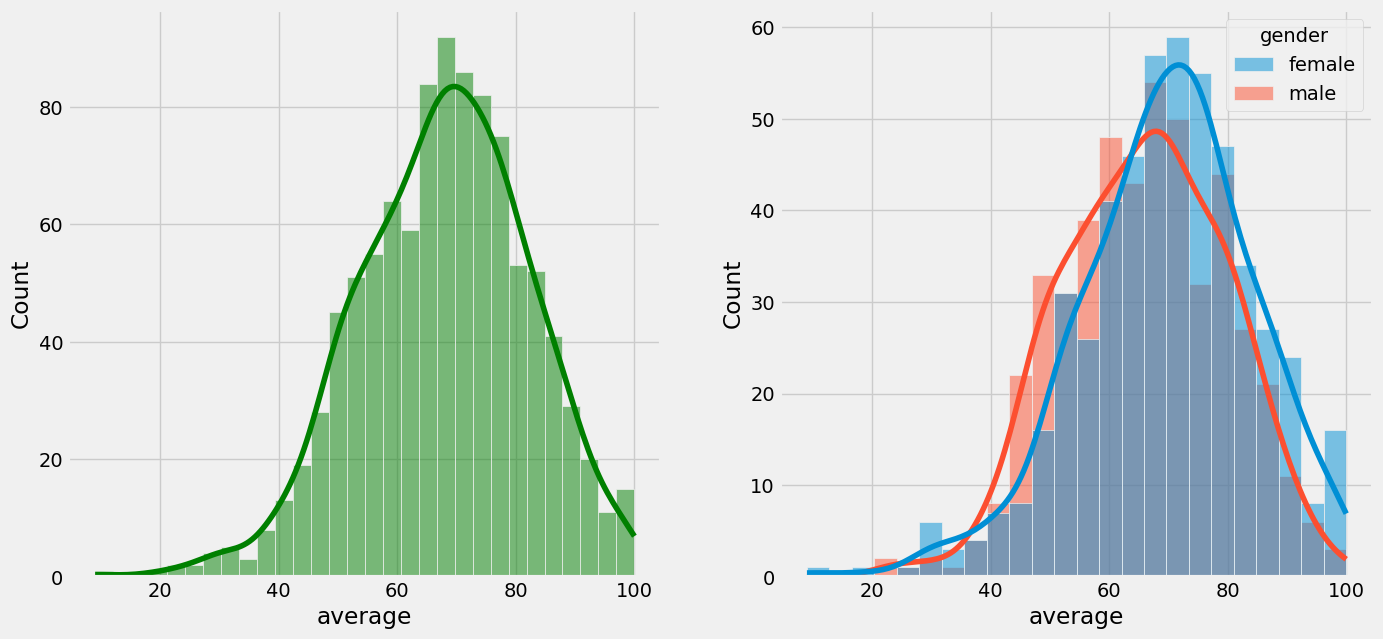

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

#### Insights
- Female students tend to perform well than male students.

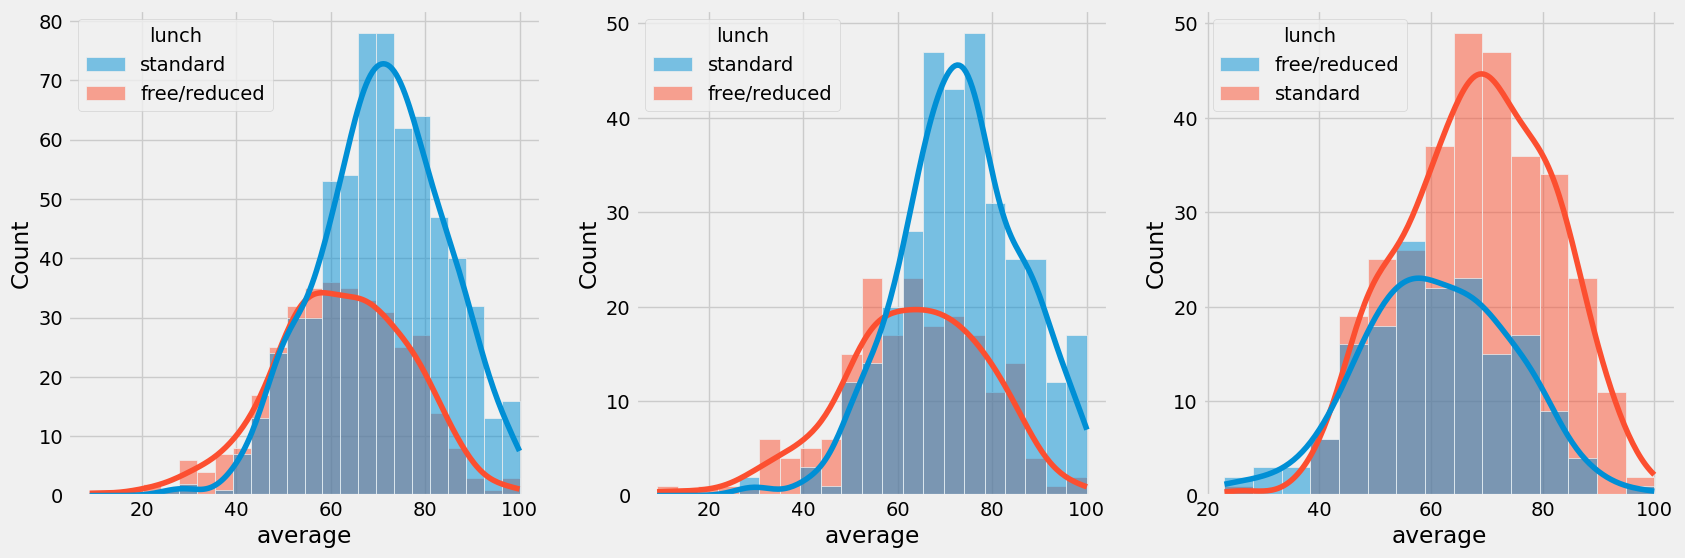

In [87]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insights
- Standard lunch helps to perform well in exams.
- Standard lunch helps to perform well in exams be it male or female .

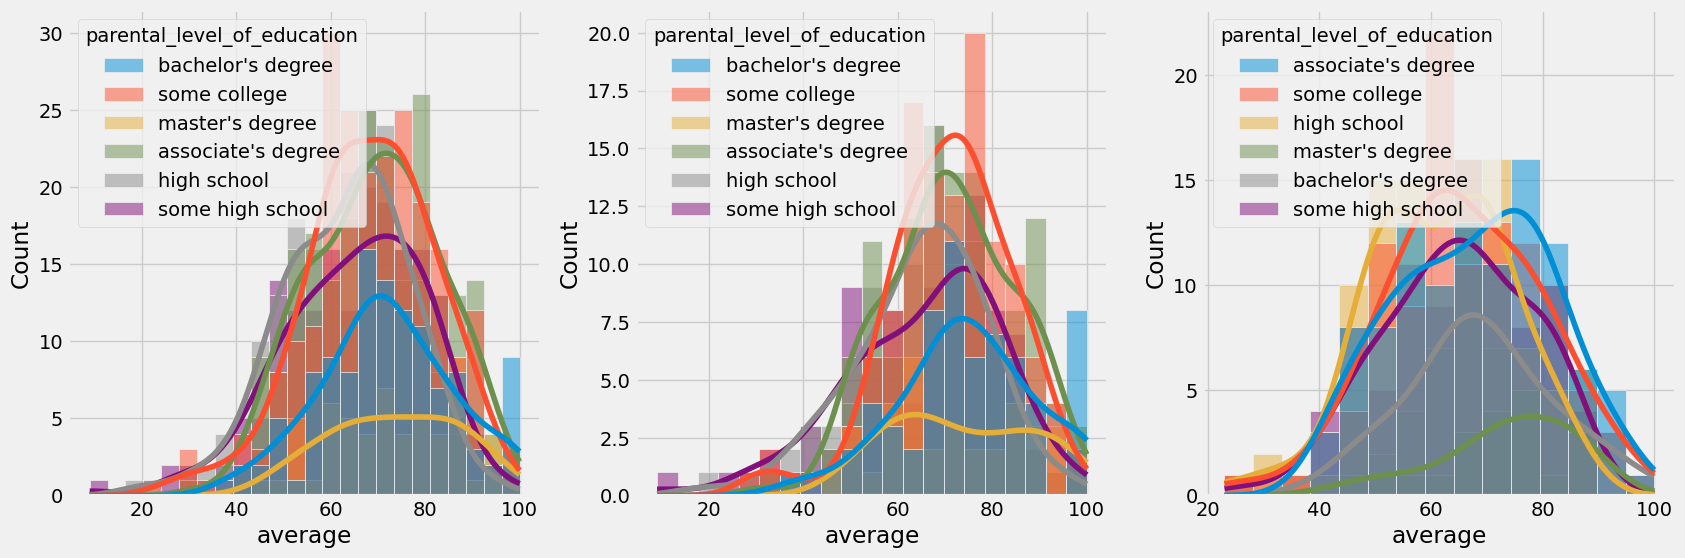

In [88]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#### Insights
- In general parent's eduction don't help student to perform well in exams.
- 2nd plot shows that there is no effect of parent's education on female students.
- 3rd plot shows that parent's whose education is of associat 's degreee or master's degree their male child tend to perform well in exam.


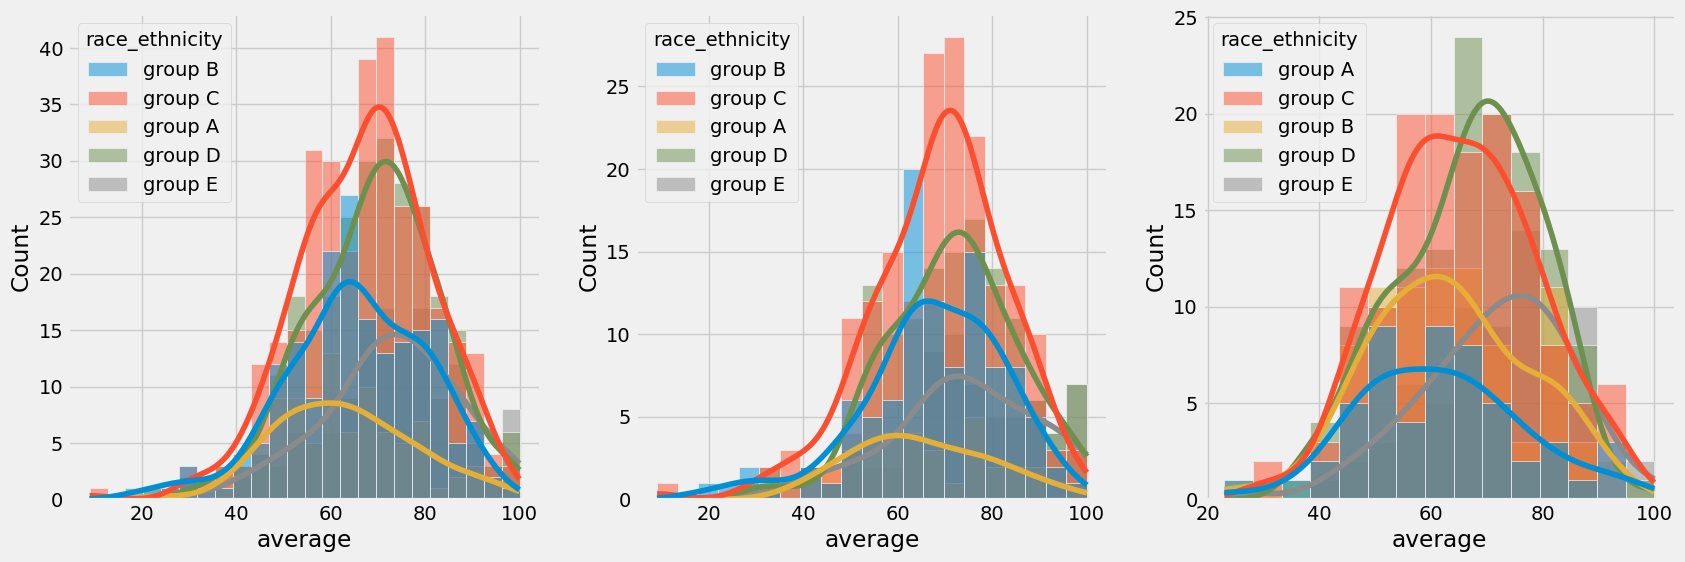

In [89]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female .

### 4.2 Maximum score of students in all three subjects

<Axes: title={'center': 'WRITING SCORES'}, ylabel='writing_score'>

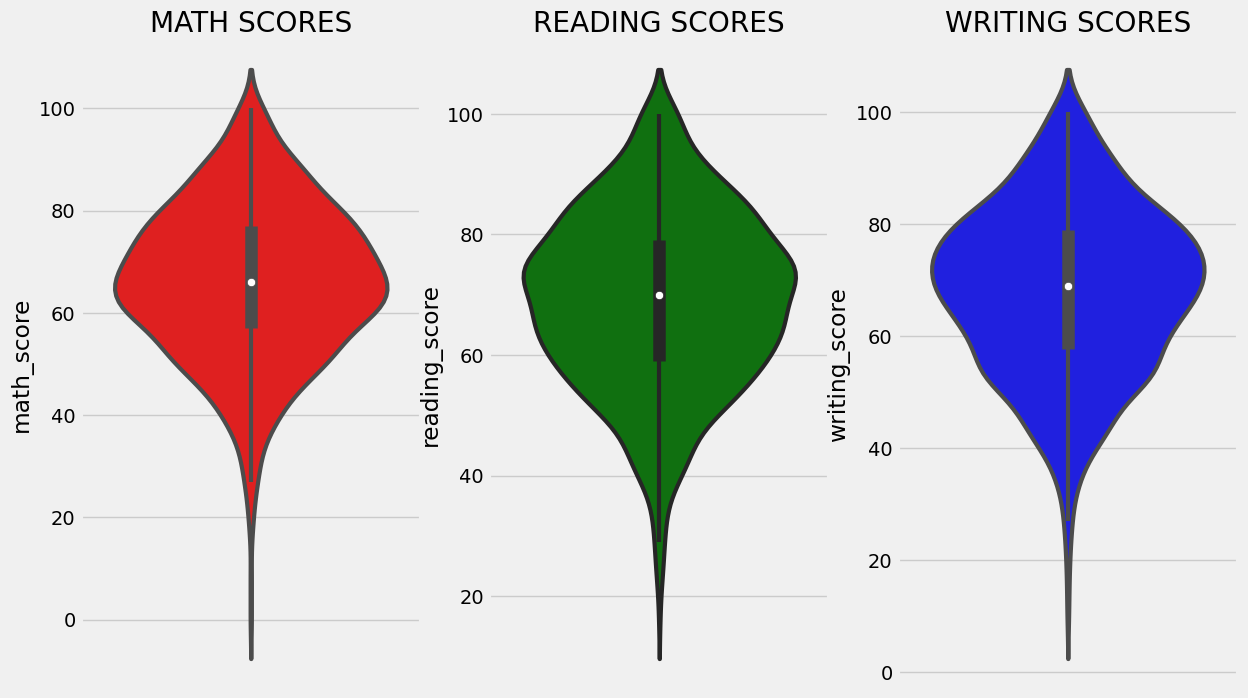

In [90]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writin most of them score from 50-80 .

### 4.3 Multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

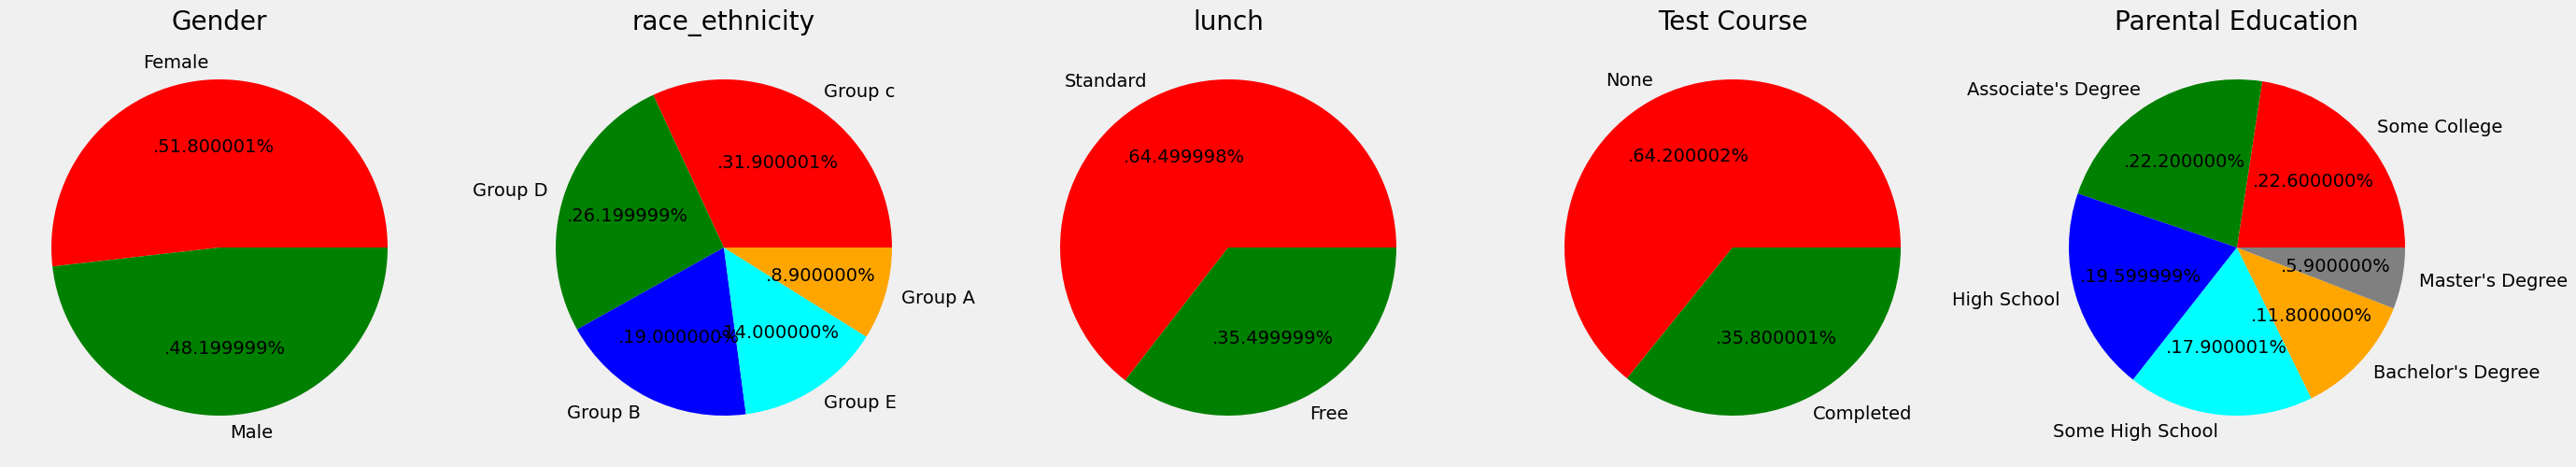

In [91]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female' , 'Male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group c' , 'Group D' , 'Group B' , 'Group E' , 'Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('race_ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard' , 'Free' 
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None' , 'Completed' 
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test Course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College' , "Associate's Degree" , 'High School' , 'Some High School' , "Bachelor's Degree" , "Master's Degree"
color = ['red','green','blue','cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')



#### Insights
- Number of male and female students are almost equal.
- Number of students are greatest in Group C followed by Group D .
- Number of students having standard lunch are greater.
- Number of students who didnot Enrolled in any test preparation course is greater.
- Number of students whose parental education is "Some College" is greater closely followed by "Associate's Degree"

### 4.4 Feature Wise Visualization

#### 4.4.1 Gender Column
- How is Gender distributed ?
- Is gender has any impact on students's performance ?

#### UNIVARIATE ANALYSIS (How Gender is distributed ?)

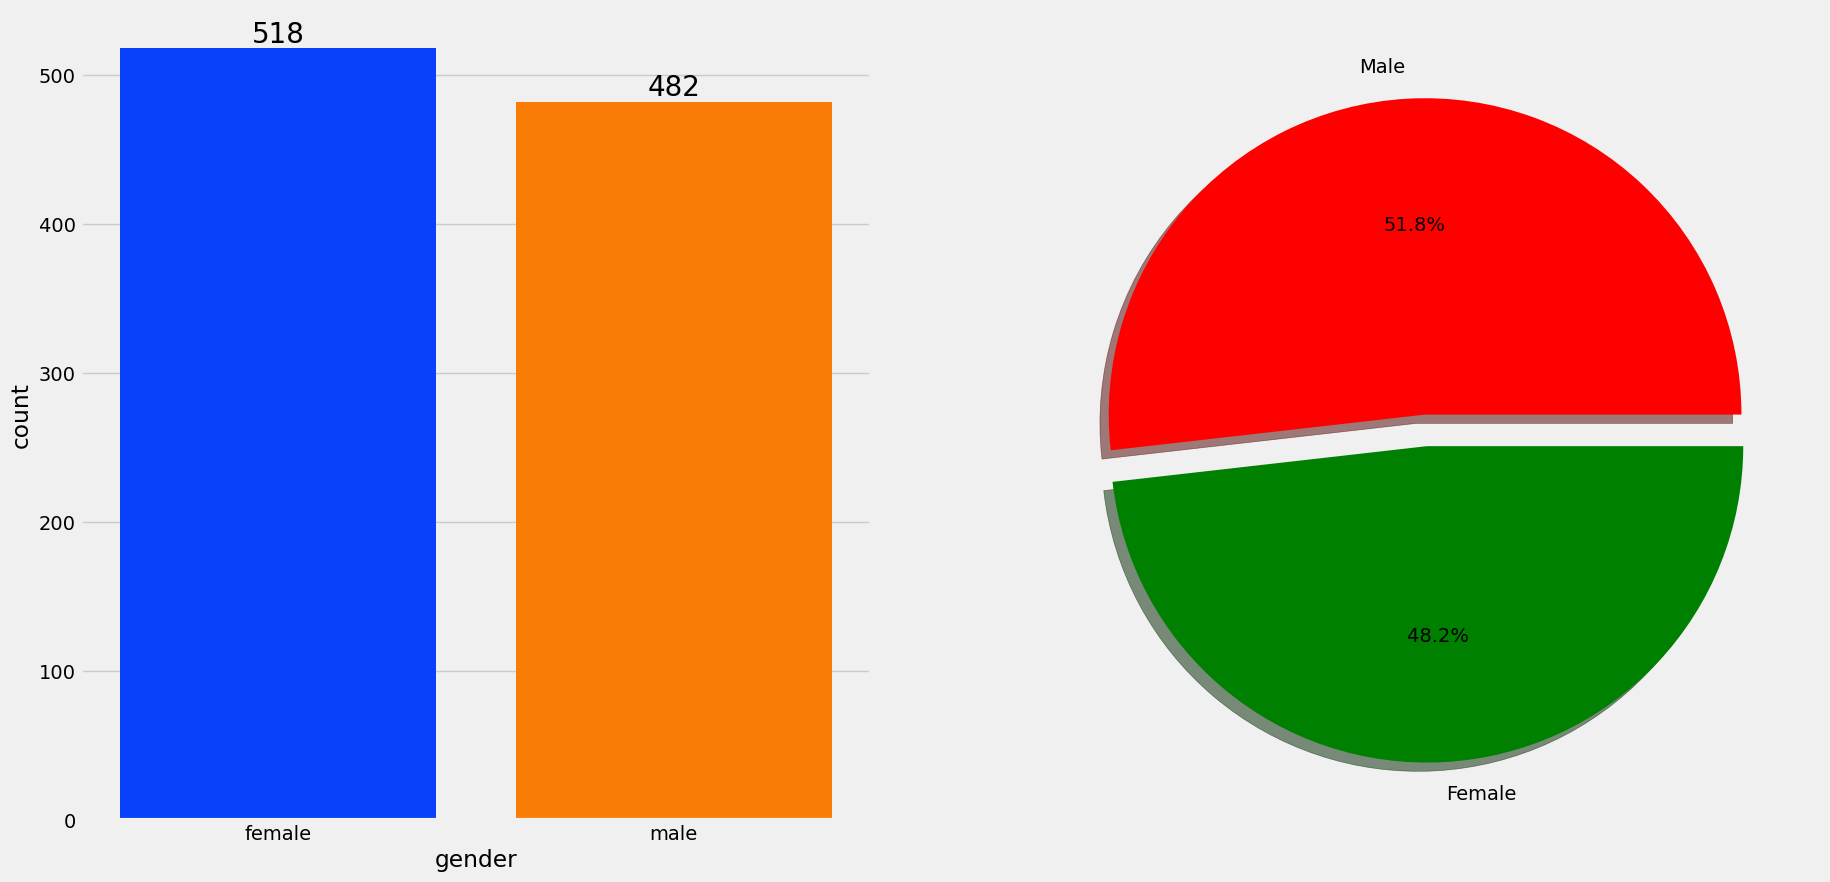

In [92]:
f , ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['red','green'])
plt.show()

#### Insights
- Gender has balanced data with female students are 518(48%) and male students are 482(52%)

#### BIVARIATE ANALYSIS (Is gender has any impact on student's performance ?)

In [130]:
X = ['math_score','average','gender']
gender_group = df[X].groupby('gender')
gender_group = gender_group.mean()
print(gender_group)

        math_score    average
gender                       
female   63.633205  69.569498
male     68.728216  65.837483


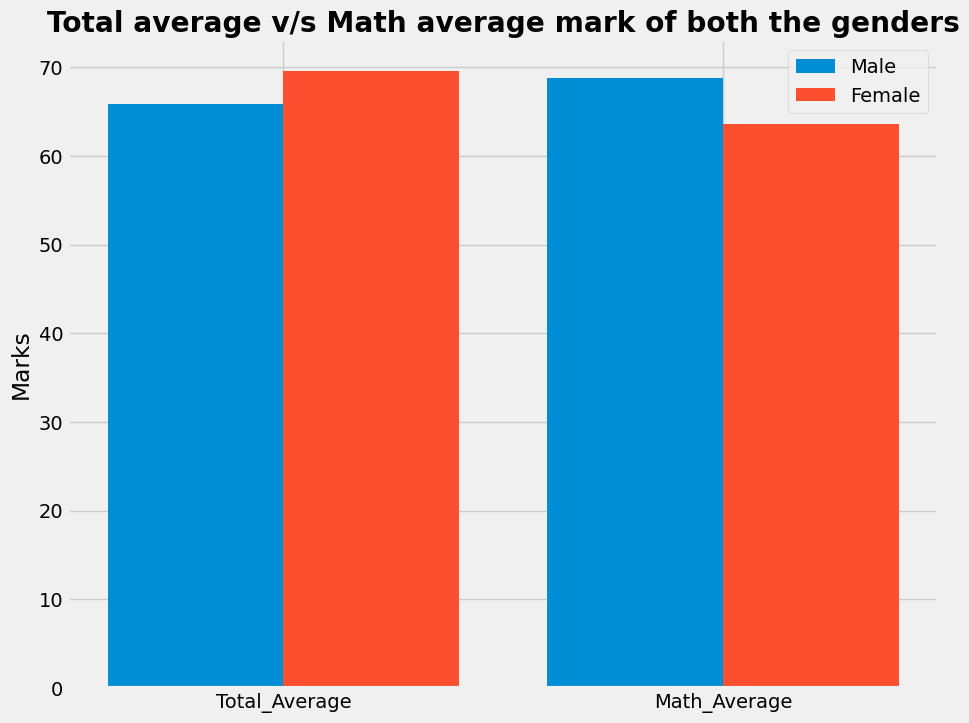

In [94]:
plt.figure(figsize=(10,8))

X = ['Total_Average','Math_Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2 , male_scores , 0.4 ,label = 'Male' )
plt.bar(X_axis + 0.2 , female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average mark of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
- On an average females have a better overall score than men .
- whereas males have scored higher in Maths.

#### 4.4.2 Race/Ethnicity Column
- How is Group wise distribution ?
- Is race/ethnicity has any impact on student's performance ?

#### Univariate Analysis (What is Group wise distribution ?)

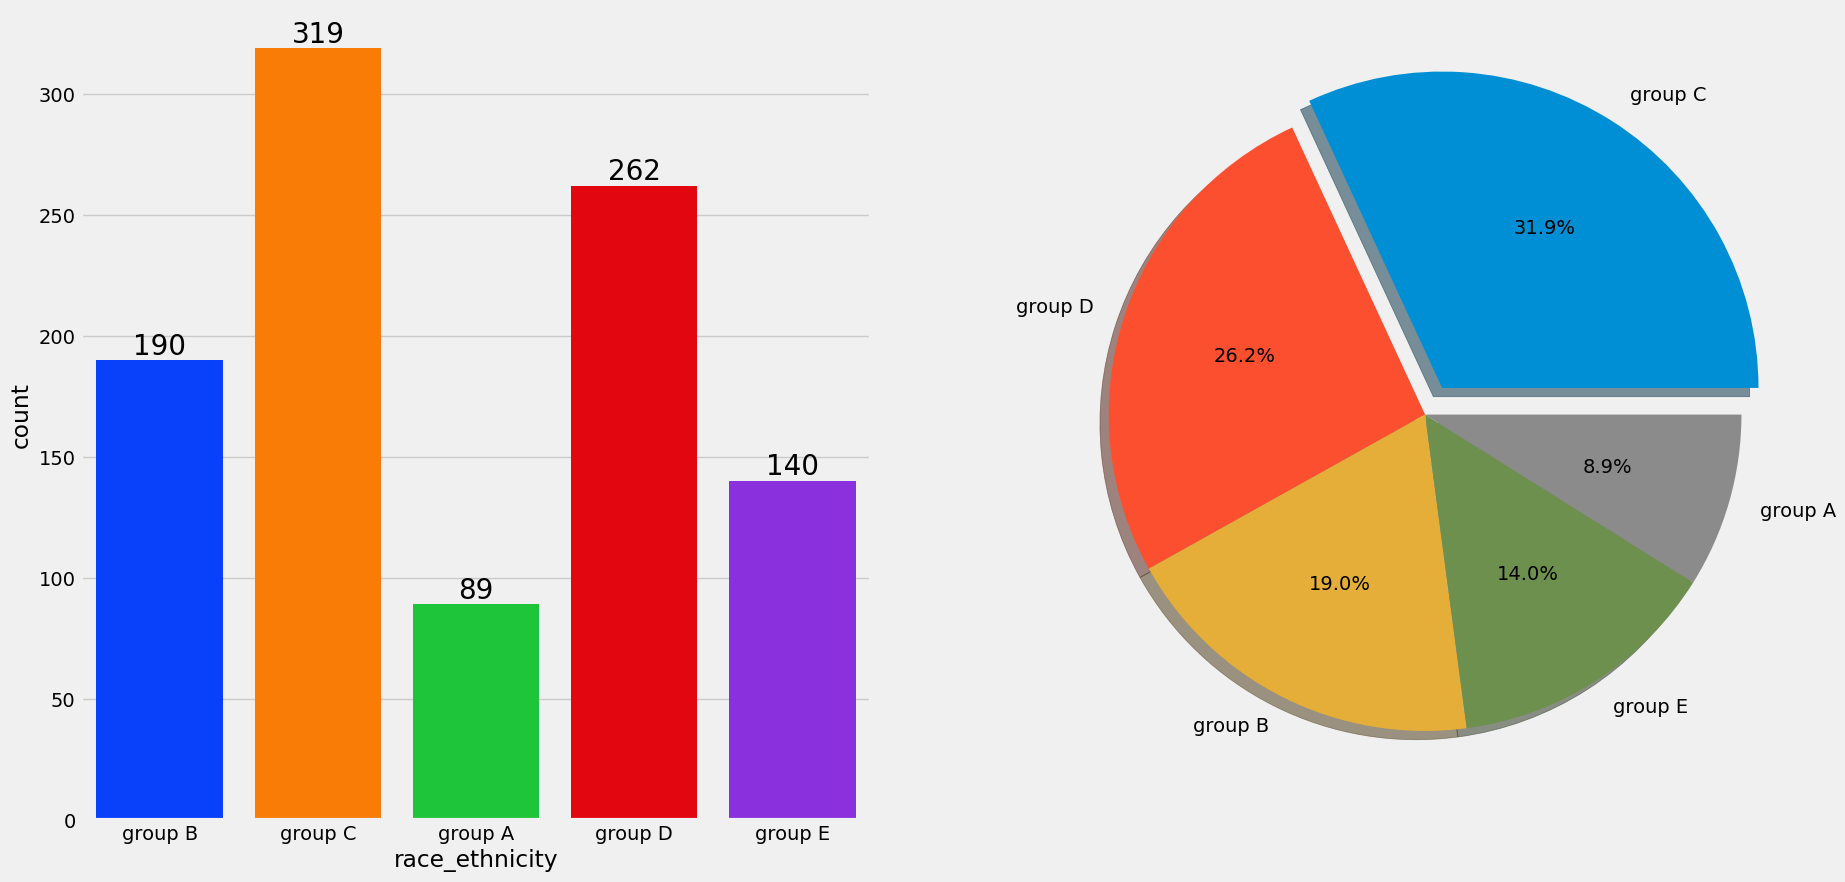

In [95]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data = df , palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers :
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index , explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights
- Most of the students belonging from Group C and group D
- lowest number of students belongs to group A.

#### Bivariate Analysis (Is race/ethnicity has any impact on student's performance ?)

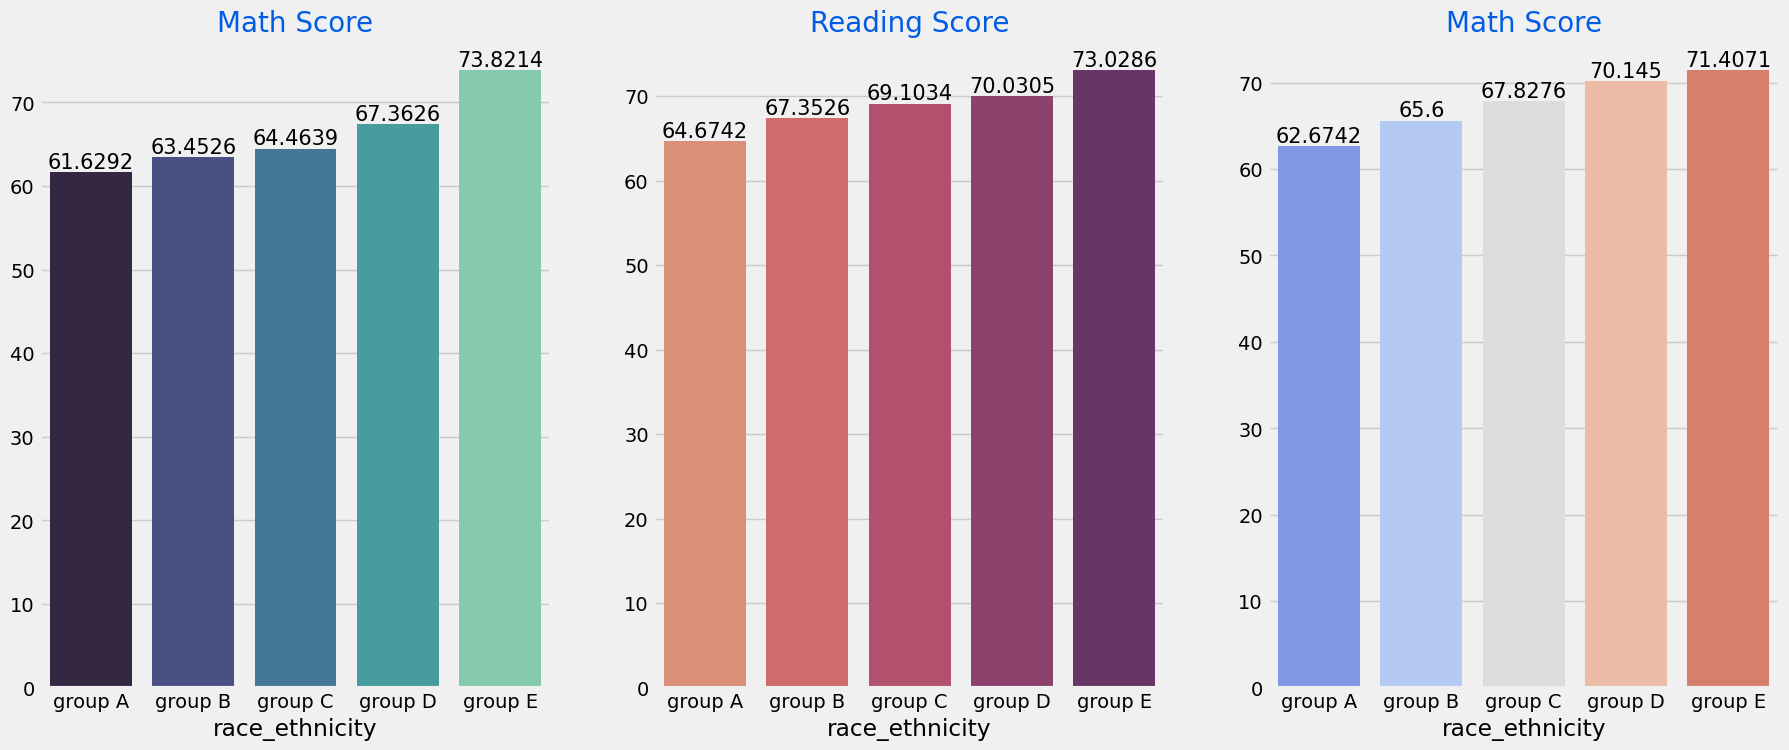

In [96]:
group_race_ethnicity = df.groupby('race_ethnicity')
f,ax =plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=group_race_ethnicity['math_score'].mean().index , y = group_race_ethnicity['math_score'].mean().values , palette='mako',ax=ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=20)
for container in ax[0].containers :
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_race_ethnicity['reading_score'].mean().index , y = group_race_ethnicity['reading_score'].mean().values , palette='flare',ax=ax[1])
ax[1].set_title('Reading Score',color='#005ce6',size=20)
for container in ax[1].containers :
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_race_ethnicity['writing_score'].mean().index , y = group_race_ethnicity['writing_score'].mean().values , palette='coolwarm',ax=ax[2])
ax[2].set_title('Math Score',color='#005ce6',size=20)
for container in ax[2].containers :
    ax[2].bar_label(container,color='black',size=15)

#### Insights
- group E students have scored the highest marks.
- group A students have scored th lowest marks.
- stdents from a lower socioeconomic status have a lower avg in all course subjects.

#### 4.4.3 Parental Level of Educational Column
- What is educational background of student's parent ?
- Is parental eductaion has any impact on studnet's performance ?

#### Univariate Analysis (What is educational background of students's parent?)

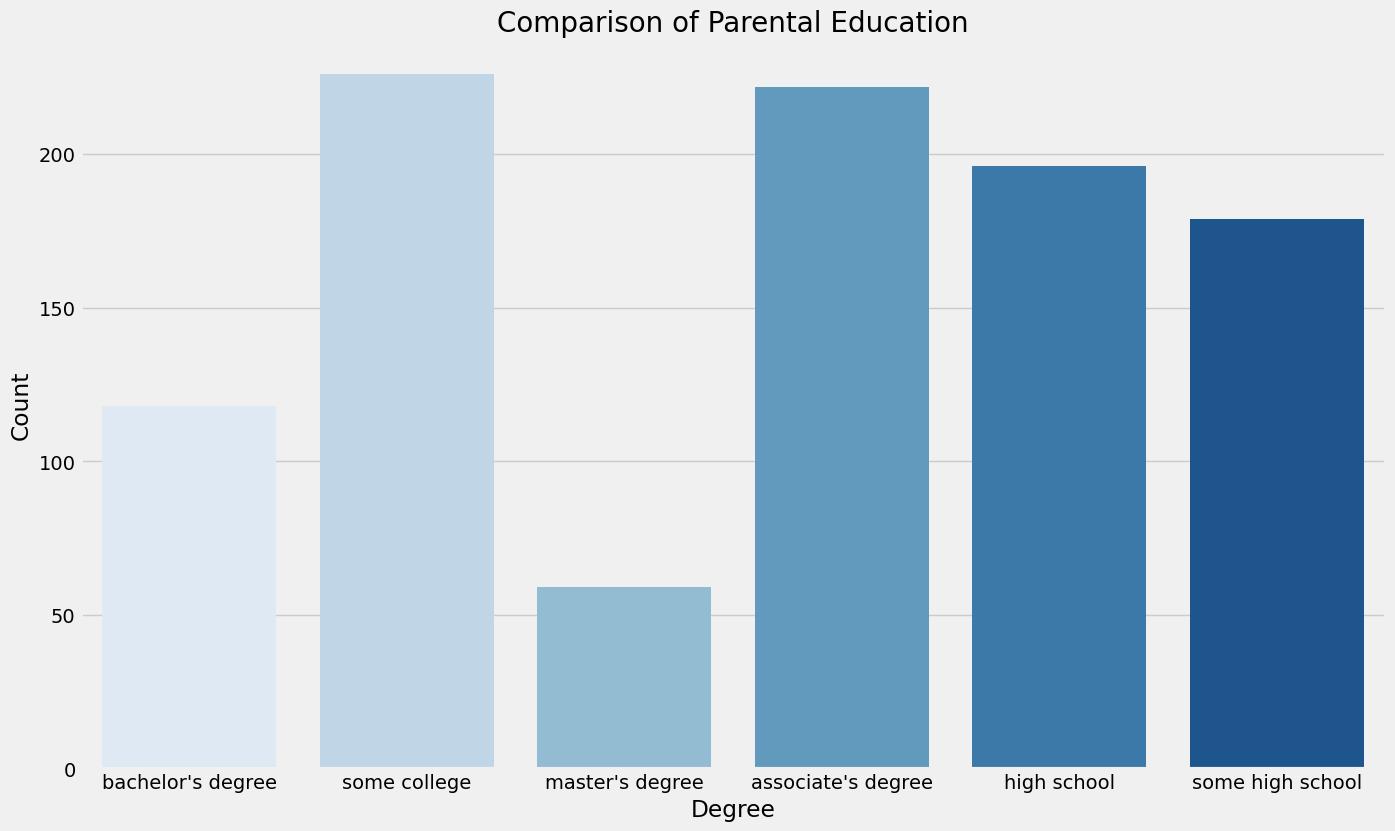

In [97]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(data = df , x = 'parental_level_of_education',palette='Blues')
plt.title('Comparison of Parental Education', fontweight = 30 , fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### Insights
- Largest number of parents are from some college.

#### Bivariate Analysis ( Is parental education has any impact on students's performance ?)

In [98]:
X = ['average','parental_level_of_education']
group_parental_level_of_education = df[X].groupby('parental_level_of_education')
group_parental_level_of_education = group_parental_level_of_education.mean()

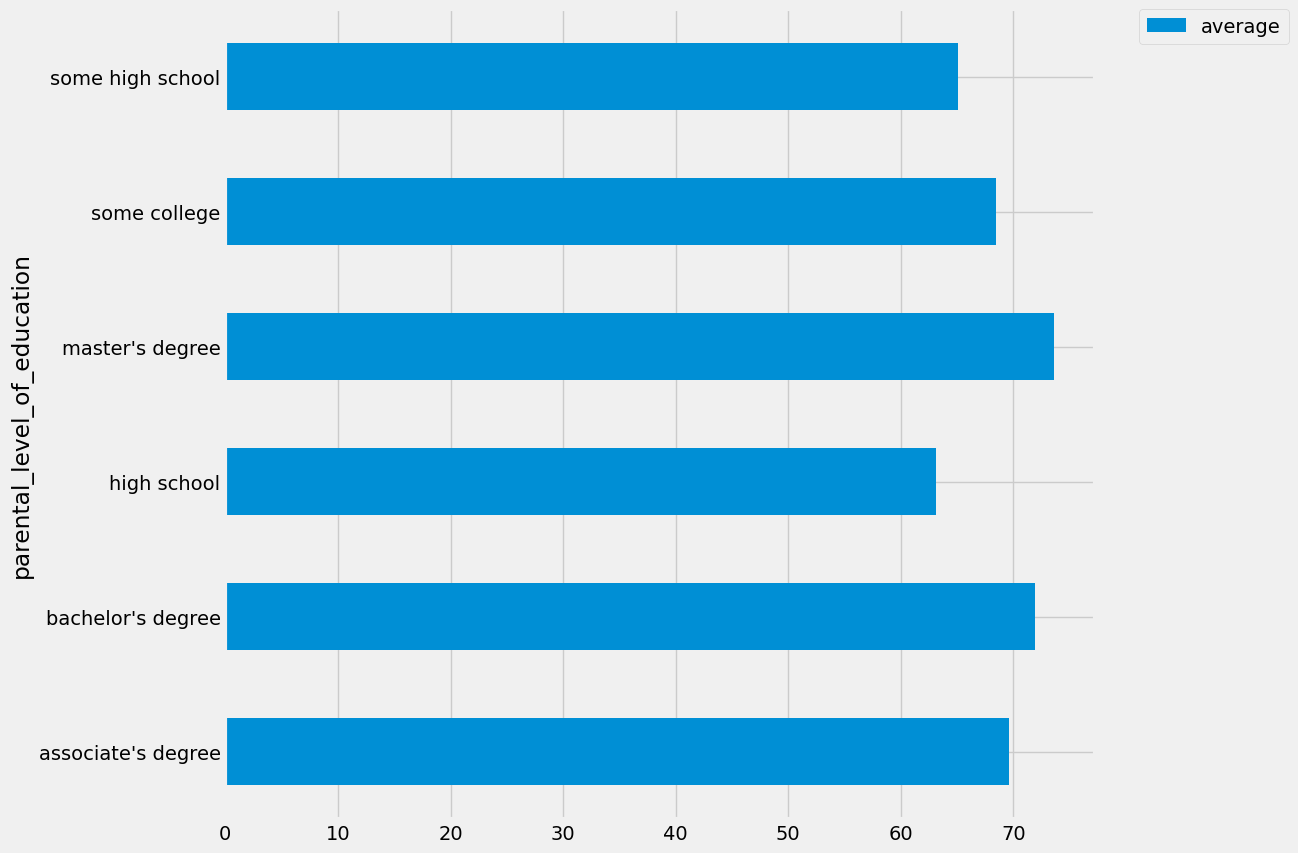

In [99]:
group_parental_level_of_education.plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc = 2 ,borderaxespad=0)
plt.show()

#### Insights
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 Lunch Column
- Which type of lunch is most common among students ?
- What is the effect of lunch type on test results ?

#### Univariate Analysis (Which type of lunch is most common among students ?)

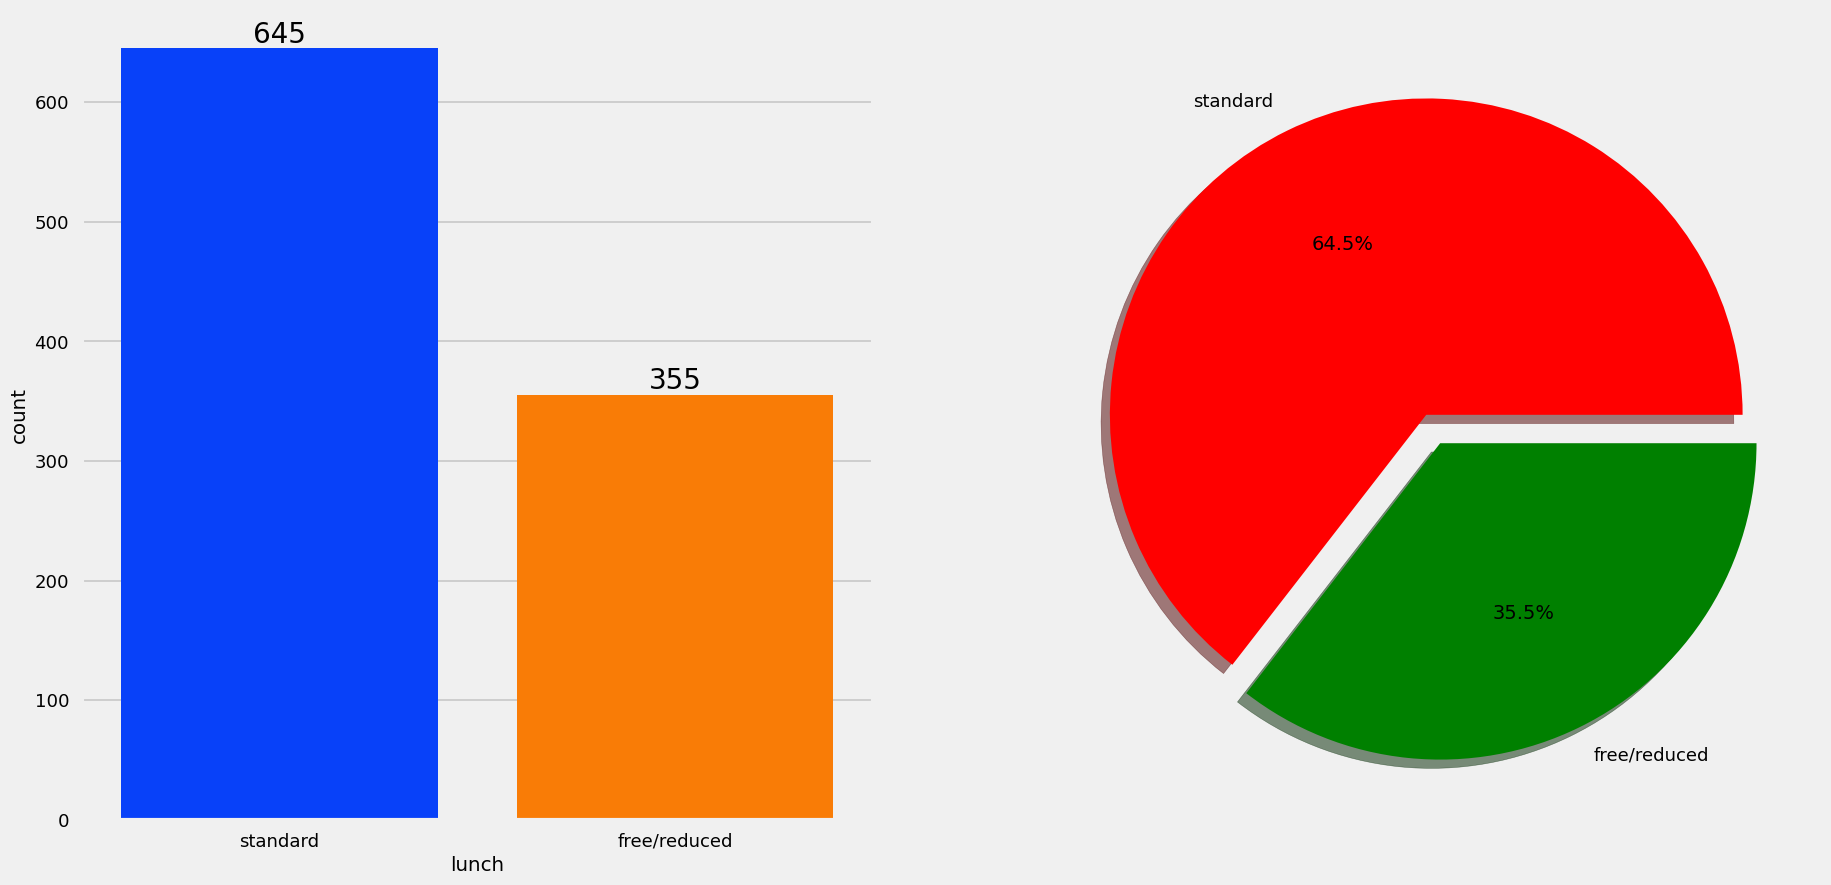

In [107]:
f , ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['lunch'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['lunch'].value_counts(),labels=['standard','free/reduced'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['red','green'])
plt.show()

#### Insights
- Students being served Standard lunch was more than free lunch

#### Bivariate Analysis (Is lunch type inktak has any impact on studet's performance?)

In [115]:
X = ['lunch']
group_lunch = df[X].groupby('lunch')
group_lunch = group_lunch.value_counts()

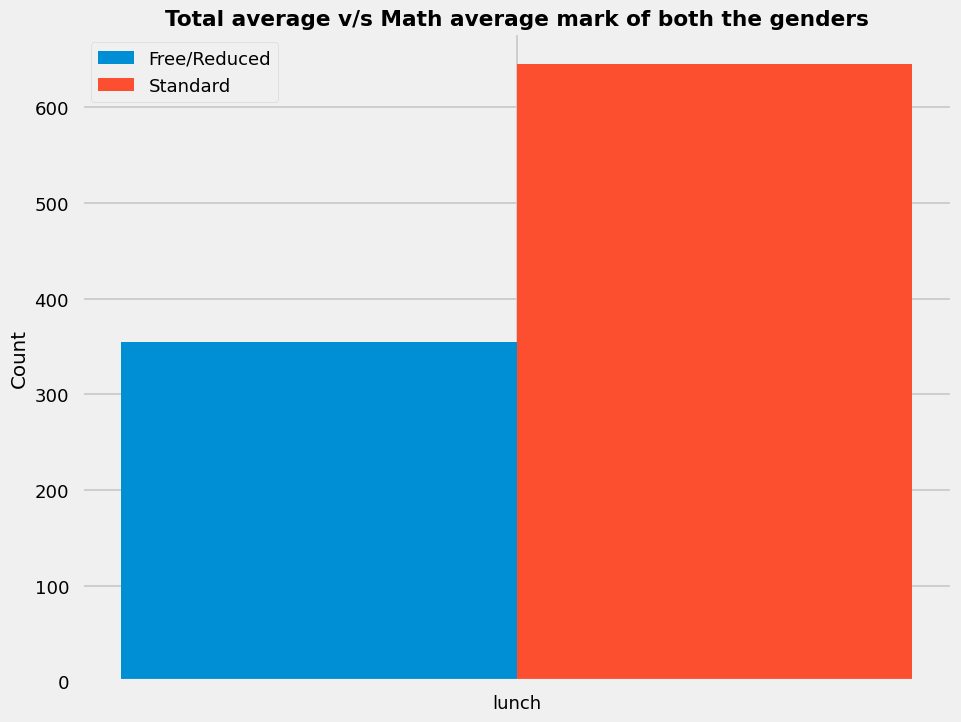

In [117]:
plt.figure(figsize=(10,8))

free_reduced = [group_lunch[0], group_lunch[0]]
standard = [group_lunch[1], group_lunch[1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2 , free_reduced , 0.4 ,label = 'Free/Reduced' )
plt.bar(X_axis + 0.2 , standard, 0.4, label = 'Standard')

plt.xticks(X_axis, X)
plt.ylabel("Count")
plt.title("Total average v/s Math average mark of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch .

#### 4.4.5 Test Preparation course Column
- Did students completed the course or not ?
- Is test preparation course has any impact on student's performance ?

#### Univariate Analysis (Did students completed the course or not ?)

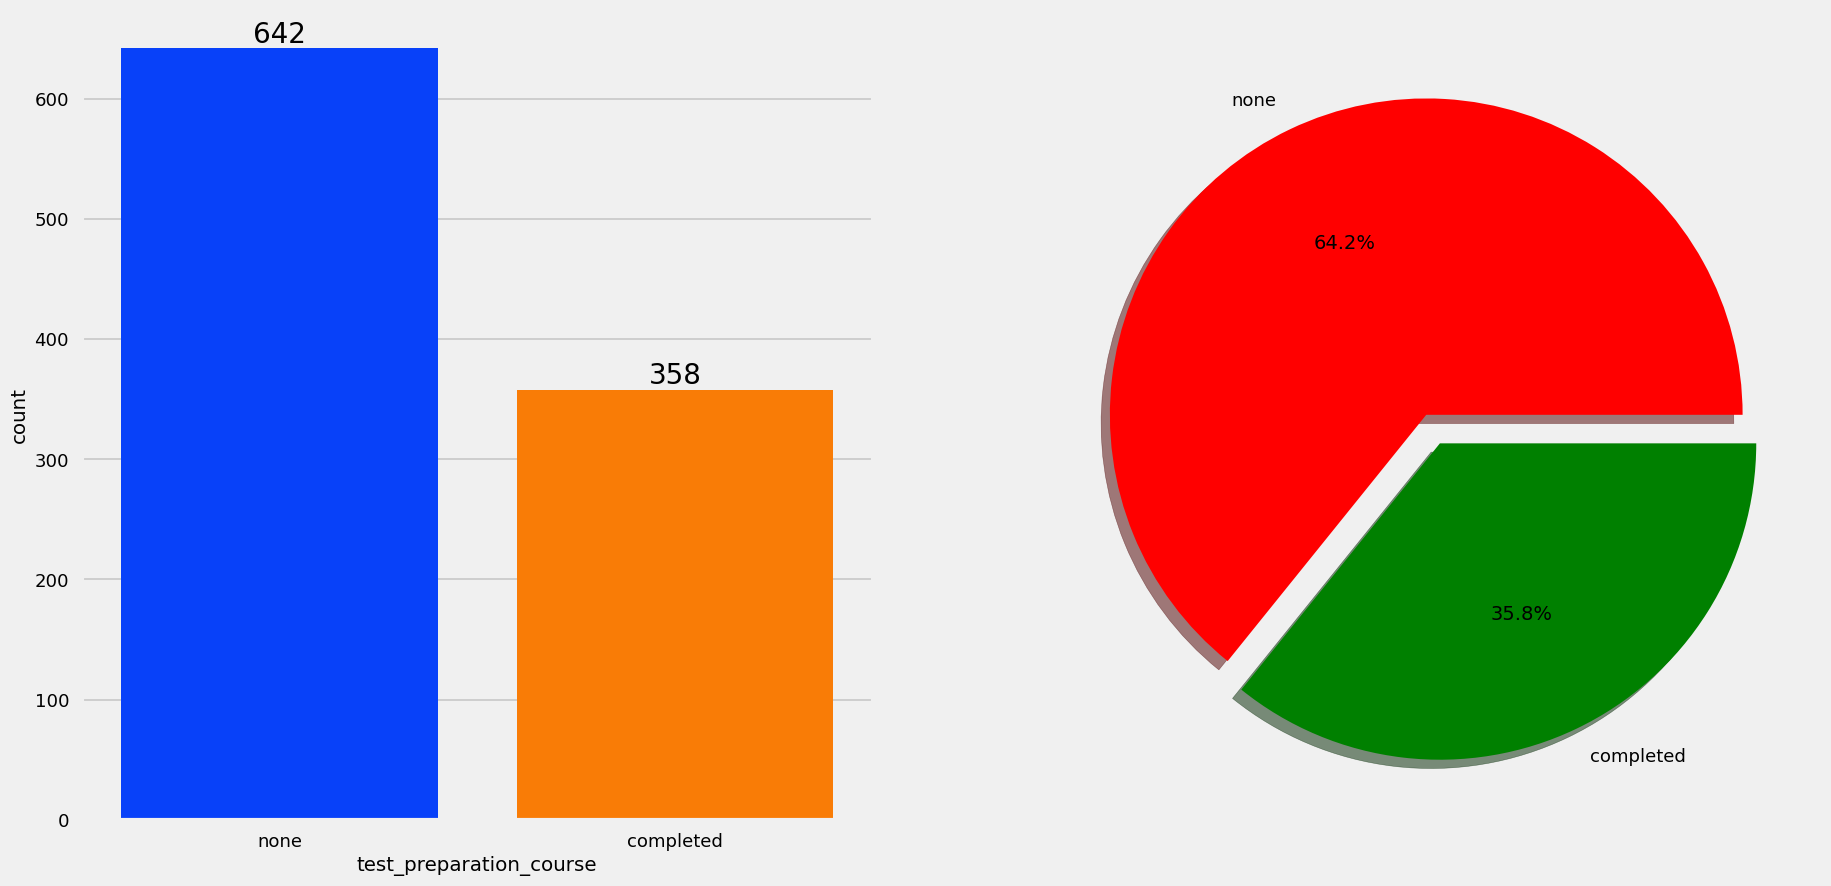

In [118]:
f , ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['test_preparation_course'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['test_preparation_course'].value_counts(),labels=['none','completed'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['red','green'])
plt.show()

#### Insights
- Most of the students didnot completed the course 

#### Bivariate Analysis (Is test preparation course has any impact on student's performance ?)

In [138]:
X = ['math_score','reading_score','writing_score','test_preparation_course']
test_preparation_course_group = df[X].groupby('test_preparation_course')
test_preparation_course_group= test_preparation_course_group.mean()

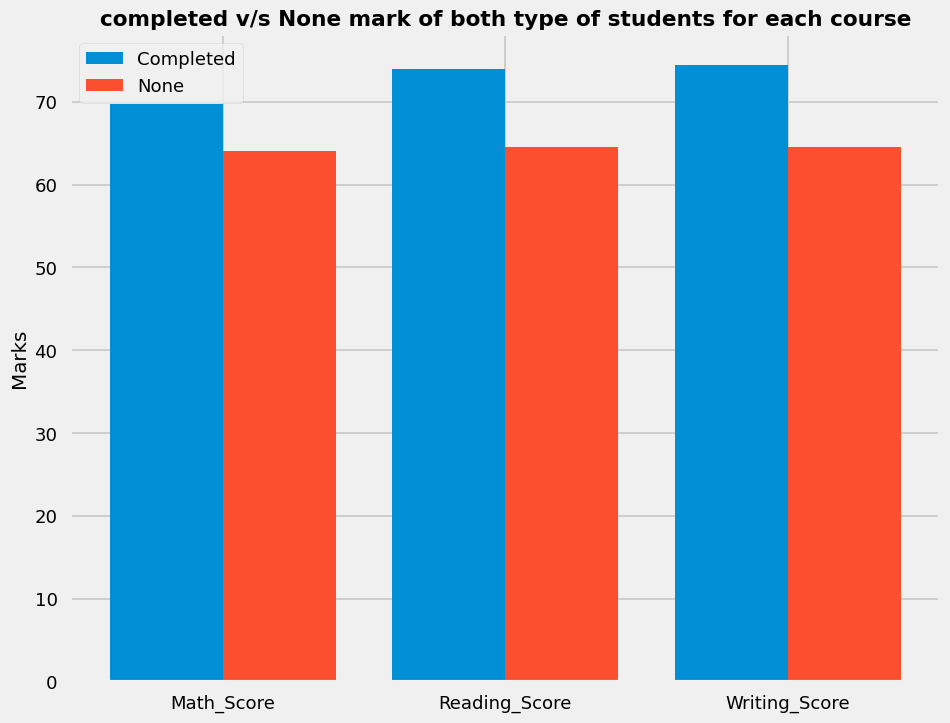

In [139]:
plt.figure(figsize=(10,8))

X = ['Math_Score','Reading_Score','Writing_Score']

completed_math_score = [test_preparation_course_group['math_score'][0], test_preparation_course_group['reading_score'][0],test_preparation_course_group['writing_score'][0]]
none_math_score = [test_preparation_course_group['math_score'][1], test_preparation_course_group['writing_score'][1],test_preparation_course_group['writing_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2 , completed_math_score , 0.4 ,label = 'Completed' )
plt.bar(X_axis + 0.2 , none_math_score, 0.4, label = 'None')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("completed v/s None mark of both type of students for each course", fontweight='bold')
plt.legend()
plt.show()

#### Insights
- Students who have completed the test preparation course have scores higher in all three categories than those who have not taken the course .

#### 4.4.6 checking Outiers


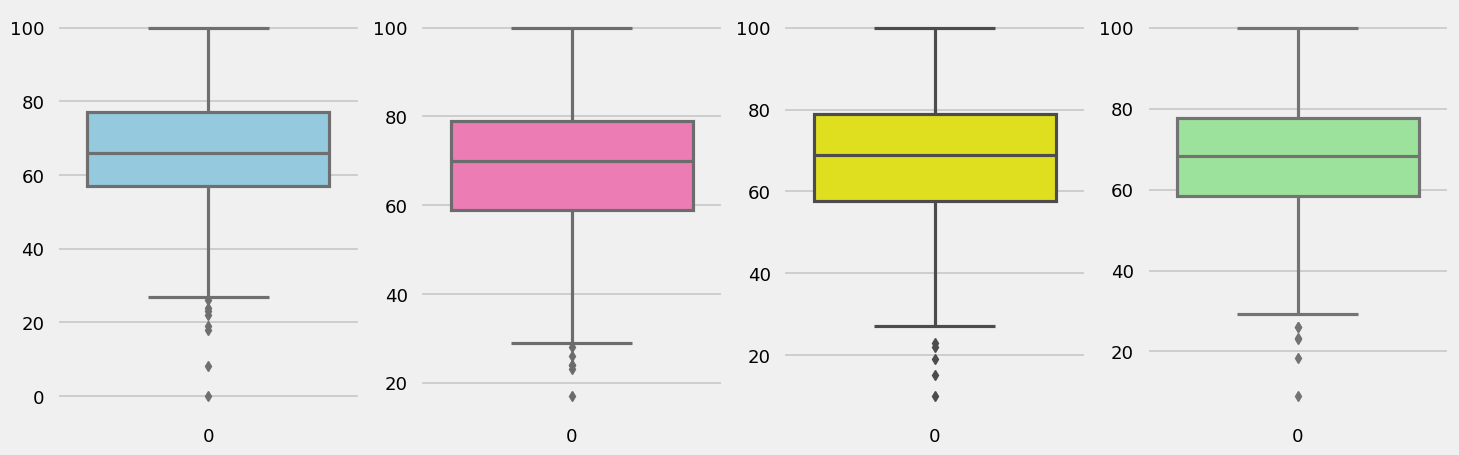

In [140]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 Multivariate Analysis using pairplot

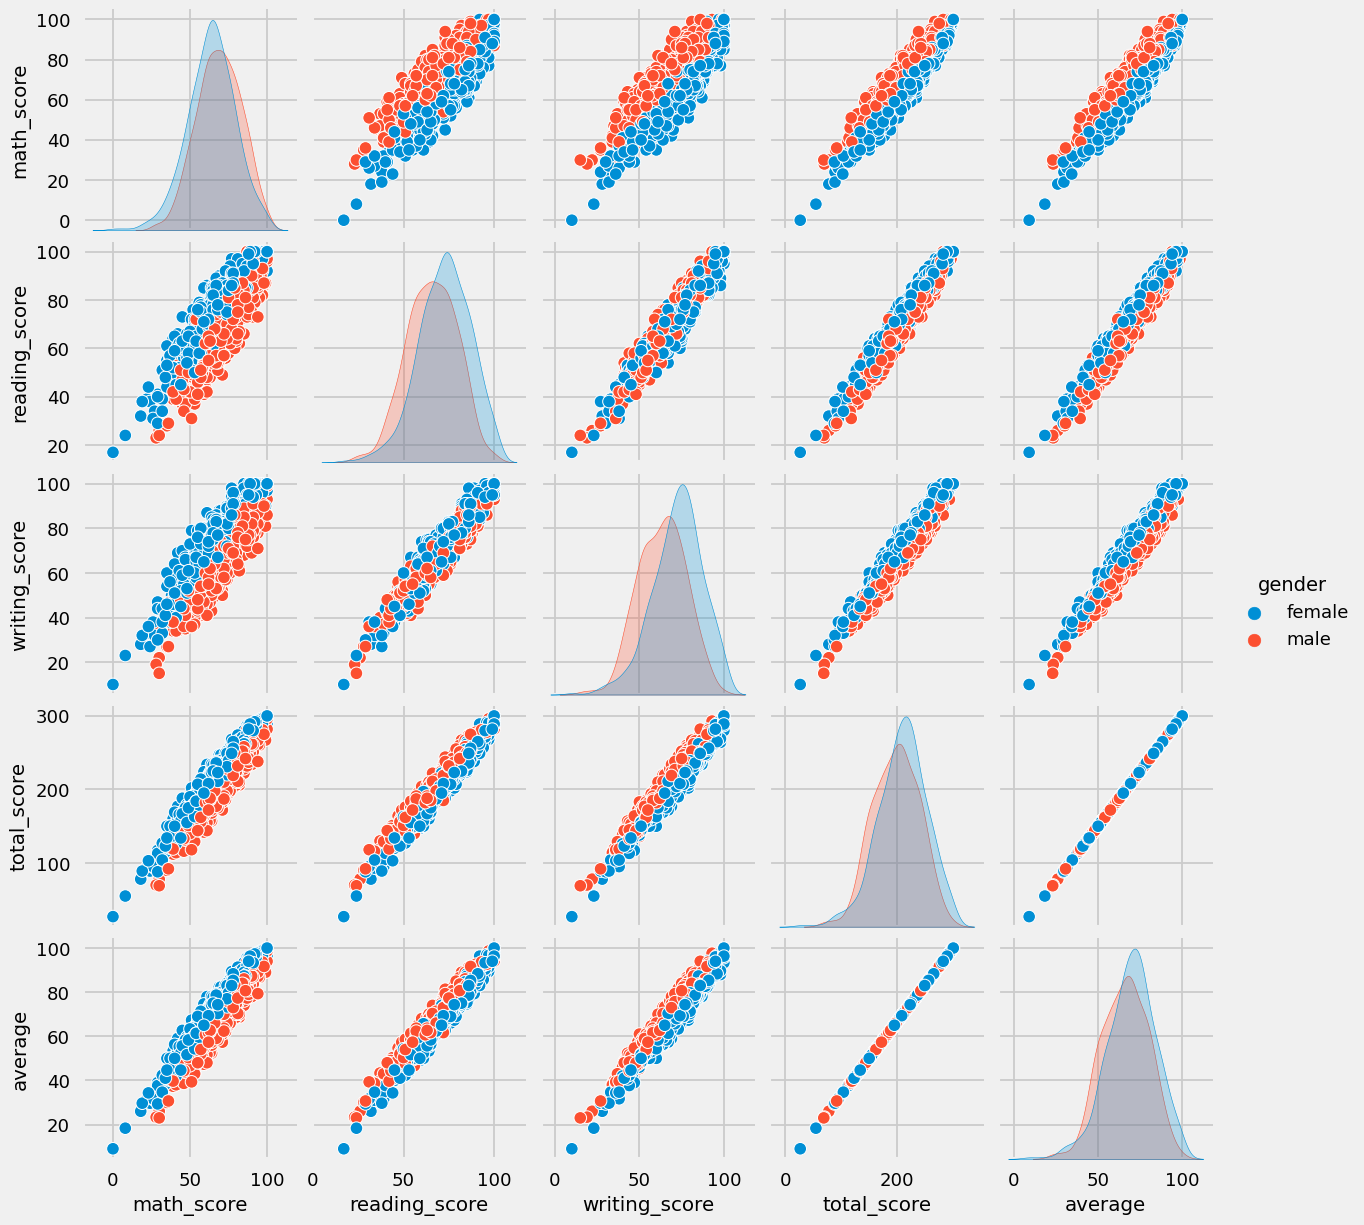

In [141]:
sns.pairplot(df,hue='gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

## 5) Conclusions
- Student's Performance is related with lunch , race, parental Level education.
- Females lead in pass percentage and also are top-scores
- Finishing Preparation Course is beneficial .